# Pregunta 2
## Desarrollo a)
Las clases son 2: +1 y -1, que indican si un comentario es positivo o negativo.
A continuación se muestra la cantidad de ejemplos que pertenece a cada clase en cada conjunto.
<table>
<tr><td></td><td>Clase +1</td><td>Clase -1</td>
</tr>
<tr> <td>Train Set</td><td>1784</td><td>1770</td>
</tr>
<tr> <td>Test Set</td><td>1803</td><td>1751</td>
</tr>
</table>


In [60]:
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape
print train_df[:10]

(3554, 2)
(3554, 2)
   Sentiment                                               Text
0         -1  everything's serious , poetic , earnest and --...
1         -1  narratively , trouble every day is a plodding ...
2          1  a truly wonderful tale combined with stunning ...
3          1  jason patric and ray liotta make for one splen...
4         -1  haneke keeps us at arm's length . guided more ...
5         -1  richard pryor mined his personal horrors and c...
6         -1  puts on airs of a hal hartley wannabe film -- ...
7         -1  the characters are interesting and the relatio...
8         -1  this long and relentlessly saccharine film is ...
9         -1  the movie's progression into rambling incohere...


In [61]:
clase_pos = train_df.Sentiment.value_counts()[-1]
clase_neg = train_df.Sentiment.value_counts()[1]
print clase_pos, clase_neg, clase_pos + clase_neg

clase_pos = test_df.Sentiment.value_counts()[-1]
clase_neg = test_df.Sentiment.value_counts()[1]
print clase_pos, clase_neg, clase_pos + clase_neg


1784 1770 3554
1803 1751 3554


## Desarrollo b)
Se utilizará el stemming de porter.
Al realizar stemming se observa que las palabras obtenidas están cortadas a lo que se espera sea su raíz. Por ejemplo, se observa que movie se transforma en movi luego del stemming, cuando movi no tiene ningún significado.
Por otra parte running se transforma en run, esta transformación si es coherente. Pero como se ha visto no funcionan siempre los algoritmos de stemming.

Al no realizar stemming las palabras quedan como aparecen, a excepción de las stopwords que son removidas por su poco aporte de significado en las frases.

In [62]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import *

def word_extractor(text, Filter=True):
    stemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ stemmer.stem(word.lower()) for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    
    for word in wordtokens:
        if Filter == True:
            if word not in commonwords:
                words+=" "+word
        else:
            words+=" "+word
    return words

print word_extractor("I love to eat cake")
print word_extractor("I am a runner and eat cake")
print word_extractor("I am running and eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")
print word_extractor("holywood movies are the best")
print word_extractor("resembling")
print word_extractor("cats running ran cactus cactuses cacti community communities")
print word_extractor("jumping")
print word_extractor("awakened")
print word_extractor("bestrewed")


 love eat cake
 runner eat cake
 run eat cake
 love eat cake
 love eat cake
 love eat cake
 n't love eat cake
 holywood movi best
 resembl
 cat run ran cactu cactus cacti commun commun
 jump
 awaken
 bestrew


## Desarrollo c)
Se utiliza el lematizador WordNet. A diferencia del stemming la lematización utiliza una base de datos léxica, por lo que sus resultados son mejores, dado que analiza morfológicamente las palabras.

Los resultados muestran que stemming realiza más transformaciones que la lematización, sin embargo stemming tiende a dejar formas sintácticas que no existen. Por ejemplo transforma resembling en resembl. Por otra parte, la lematización fue capaz de detectar la raíz de community y comminities como community, siendo que stemming cortó ambas palabras a "commun".

In [63]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize

def word_extractor2(text, Filter=True):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) for word in word_tokenize(text.decode('utf-8','ignore')) ]
    for word in wordtokens:
        if Filter == True:
            if word not in commonwords:
                words+=" "+word
        else:
            words+=" "+word
    return words

print word_extractor2("I love to eat cake")
print word_extractor2("I am a runner and eat cake")
print word_extractor2("I am running and eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")
print word_extractor2("holywood movies are the best")
print word_extractor2("I am running to the sun")
print word_extractor2("I love to eat cake")
print word_extractor2("cats running ran cactus cactuses cacti community communities")
print word_extractor2("jumping")
print word_extractor2("resembling")
print word_extractor2("awakened")
print word_extractor2("bestrewed")




 love eat cake
 runner eat cake
 running eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake
 holywood movie best
 running sun
 love eat cake
 cat running ran cactus cactus cactus community community
 jumping
 resembling
 awakened
 bestrewed


## Desarrollo d)
Son 9663 palabras en total se listarán el top 10 palabras según frecuencia.
Las palabras para el conjunto de entrenamiento y validación son:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-hgcj">Frecuencia Train Set</th>
    <th class="tg-hgcj">Término Train Set</th>
    <th class="tg-hgcj">Frecuencia Test Set</th>
    <th class="tg-hgcj">Término Test Set</th>
  </tr>
  <tr>
    <td class="tg-s6z2">566</td>
    <td class="tg-s6z2">film</td>
    <td class="tg-s6z2">558</td>
    <td class="tg-s6z2">film</td>
  </tr>
  <tr>
    <td class="tg-baqh">481</td>
    <td class="tg-baqh">movie</td>
    <td class="tg-baqh">540</td>
    <td class="tg-baqh">movie</td>
  </tr>
  <tr>
    <td class="tg-baqh">246</td>
    <td class="tg-baqh">one</td>
    <td class="tg-baqh">250</td>
    <td class="tg-baqh">one</td>
  </tr>
  <tr>
    <td class="tg-baqh">245</td>
    <td class="tg-baqh">like</td>
    <td class="tg-baqh">238</td>
    <td class="tg-baqh">ha</td>
  </tr>
  <tr>
    <td class="tg-baqh">224</td>
    <td class="tg-baqh">ha</td>
    <td class="tg-baqh">230</td>
    <td class="tg-baqh">like</td>
  </tr>
  <tr>
    <td class="tg-baqh">183</td>
    <td class="tg-baqh">make</td>
    <td class="tg-baqh">197</td>
    <td class="tg-baqh">story</td>
  </tr>
  <tr>
    <td class="tg-baqh">176</td>
    <td class="tg-baqh">story</td>
    <td class="tg-baqh">175</td>
    <td class="tg-baqh">character</td>
  </tr>
  <tr>
    <td class="tg-baqh">163</td>
    <td class="tg-baqh">character</td>
    <td class="tg-baqh">165</td>
    <td class="tg-baqh">time</td>
  </tr>
  <tr>
    <td class="tg-baqh">145</td>
    <td class="tg-baqh">comedy</td>
    <td class="tg-baqh">161</td>
    <td class="tg-baqh">make</td>
  </tr>
  <tr>
    <td class="tg-baqh">143</td>
    <td class="tg-baqh">time</td>
    <td class="tg-baqh">134</td>
    <td class="tg-baqh">comedy</td>
  </tr>
</table>

In [77]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
print "features.shape: ", features_train.shape

features_test = vectorizer.transform(texts_test)

labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
print "labels train: ", labels_train[:10]
vocab = vectorizer.get_feature_names()

dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

array = zip(dist, vocab)
array.sort()
array.reverse()

array2 = zip(dist_test, vocab)
array2.sort()
array2.reverse()

print "Train: ", len(array)
print "Test: ", len(array2)

for count, tag in array[:10]:
    print count, tag
for count, tag in array2[:10]:
    print count, tag

features.shape:  (3554, 9663)
labels train:  [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
Train:  9663
Test:  9663
566 film
481 movie
246 one
245 like
224 ha
183 make
176 story
163 character
145 comedy
143 time
558 film
540 movie
250 one
238 ha
230 like
197 story
175 character
165 time
161 make
134 comedy


## Desarrollo e)
Las métricas que son entregadas por classification_report son: precision, recall, f1-score y support.
<li>precision: Se calcula como tp/(tp+fp), lo que indica la habilidad del clasificador para no etiquetar como positivo una muestra que es negativa. (tp: true positive. fp: false positive).</li>
<li>recall: Se calcula como tp/(tp+fn). Es la habilidad del clasificador para encontrar todas las muestras positivas. (fn:false negative).</li>
<li>f1-score: Se calcula como 2*(precision*recall)/(precision+recall). Se interpreta como un promedio ponderado de la precision y recall. El mejor valor es 1 y corresponde cuando la contribución de precision y recall es igual. El peor caso es 0.</li>
<li>support: Corresponde al número de ocurrencias de cada clase en los ejemplos correctamente clasificados como positivos.</li>

In [65]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

## Desarrollo f)

1. Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las carac-
terı́sticas no nulas serán tratadas como 1) y 
1.1 mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas.Utilice esta función con las caracterı́sticas extraı́das en el punto (d).

2. Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. 


3. qué representación obtiene un mejor resultado: lematización o stemming.
4. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predic-
ciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada
clase).


Al entrenar un clasificador bayesiano ingenuo, se obtiene una precisión de 95,86% en los datos de entrenamiento y un 73,85% en los datos de prueba.
Se utilizan los datos tal como fueron preprocesados en la pregunta 1.d), considerando que se realizó lematización y eliminación de stopwords antes de entrenar el modelo.

Al entrenar sin realizar la eliminación de las stopwords, la predicción de entrenamiento decae a 95,52%, pero la predicción en los datos de prueba aumenta a 74,86%.


Realizando las mismas pruebas anteriores, pero ahora utilizando stemming, se tiene lo siguiente:
<li>Naive Bayes + Stemming + Remoción de Stopwords:
<center><li>Precisión con los datos de entrenamiento: 94,28%</li><li>Precisión con los datos de pruebas: 74,78%</li></center>
</li>
<li>Relizando Naive Bayes + Stemming:
<center><li>Precisión con los datos de entrenamiento: 93,80%</li><li>Precisión con los datos de pruebas: 76,21%</li></center>
</li>


In [78]:
# 1. naive bayes con lematización y extracción de stopwords.
from sklearn.naive_bayes import BernoulliNB
import random

def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)

spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text[:60]


Training Accuracy BernoulliNB: 0.958638
Test Accuracy BernoulliNB: 0.738531
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.97957118  0.02042882] a decidedly mixed bag .

[ 0.56471363  0.43528637] those who want to be jolted out of their gourd should drop e
[ 0.95558611  0.04441389] just too silly and sophomoric to ensnare its target audience
[ 0.78506042  0.21493958] an empty , ugly exercise in druggy trance-noir and trumped-u
[ 0.90934363  0.09065637] comes across as a fairly weak retooling .

[ 0.40455023  0.59544977] enticing and often funny documentary .

[ 0.87641789  0.12358211] culkin turns his character into what is basically an anti-ha
[ 0.97859373  0.02140627] toward the end sum of all fears morphs into a mundane '70s d
[ 0.53151912  0.46848088] some movies suck you in 

In [106]:
'''def word_extractor3(text):
    # Pasa a minúsculas y extrae.
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ word.lower() for word in word_tokenize(text.decode('utf-8','ignore')) ]
    for word in wordtokens:
        words+=" "+word
    return words

print word_extractor3("I love to eat cake")
print word_extractor3("I am a runner and eat cake")
print word_extractor3("I am running and eat cake")
'''
# 2. Modelo Naive Bayes con datos sin remoción de stopwords.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor2(text, False) for text in train_df.Text]
texts_test = [word_extractor2(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

#labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
#labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)

model = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)

spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text[:60]

Training Accuracy BernoulliNB: 0.955262
Test Accuracy BernoulliNB: 0.748663
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.76      0.75      1751

avg / total       0.75      0.75      0.75      3554

[ 0.08667367  0.91332633] ( rises ) above its oh-so-hollywood rejiggering and its conv
[ 0.89432297  0.10567703] gets bogged down by an overly sillified plot and stop-and-st
[ 0.11064803  0.88935197] eight legged freaks won't join the pantheon of great monster
[ 0.23989139  0.76010861] fancy a real downer ? [leigh] lays it on so thick this time 
[ 0.98344459  0.01655541] despite the fact that this film wasn't as bad as i thought i
[ 0.9695741  0.0304259] it's fitting that a movie as artificial and soulless as the 
[ 0.53758227  0.46241773] a limp eddie murphy vehicle that even he seems embarrassed t
[ 0.01046034  0.98953966] a quietly moving look back at what it 

In [79]:
# 3. Naive Bayes Stemming y remoción de Stopwords.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

#labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
#labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)

model = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)

spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text[:60]

Training Accuracy BernoulliNB: 0.942881
Test Accuracy BernoulliNB: 0.747819
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554

[1023, 3275, 2407, 2148, 3369, 3098, 299, 3309, 2477, 990, 2849, 2435, 2498, 1843, 1628]
[ 0.22972082  0.77027918] highlighted by a gritty style and an excellent cast , it's b
[ 0.89119144  0.10880856] when a movie has stuck around for this long , you know there
[ 0.62170806  0.37829194] there's an audience for it , but it could have been funnier 
[ 0.73789501  0.26210499] like mike is a slight and uninventive movie : like the exalt
[ 0.93924639  0.06075361] collateral damage is , despite its alleged provocation post-
[  9.99340097e-01   6.59903220e-04] at every opportunity to do something clever , the film goes 
[ 0.44658419  0.55341581] �the maudlin way its sto

In [84]:
# 4. Naive Bayes Stemming sin remoción de stopwords.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text, False) for text in train_df.Text]
texts_test = [word_extractor(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

model = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)

spl = random.sample(xrange(len(test_pred)), 15)

for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.938098
Test Accuracy BernoulliNB: 0.762173
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.77      0.76      0.77      1803
          -       0.76      0.76      0.76      1751

avg / total       0.76      0.76      0.76      3554

[ 0.41646436  0.58353564] the origin story is well told , and the characters will not disappoint anyone who values the original comic books . it's in the action scenes that things fall apart .

[ 0.09168777  0.90831223] sweet and memorable film .

[ 0.98048195  0.01951805] it has the air of a surprisingly juvenile lark , a pop-influenced prank whose charms are immediately apparent and wear thin with repetition .

[ 0.95461696  0.04538304] this horror-comedy doesn't go for the usual obvious laughs at the expense of cheap-looking monsters -- unless you count elvira's hooters .

[ 0.4098698  0.5901302] it's excessively quirky and a little underconfident in its deliv

## Desarrollo g)
A continuación se realiza el entrenamiento de un clasificador bayesiano multinomial variando el preprocesamiento de los datos.
A continuación se detallarán los experimentos realizados:
<li>Multinomial Naive Bayes + lemmatization + remoción Stopwords:
<center>
<li>Train Set Precision: 95,94%</li>
<li>Test Set Precision: 74,07%</li>
</center>
</li>

<li>Multinomial Naive Bayes + lemmatization sin remoción Stopwords:
<center>
<li>Train Set Precision: 95,55%</li>
<li>Test Set Precision: 74,75%</li>
</center>
</li>

<li>Multinomial Naive Bayes + Stemming + remoción Stopwords:
<center>
<li>Train Set Precision: 94,93%</li>
<li>Test Set Precision: 74,97%</li>
</center>
</li>

<li>Multinomial Naive Bayes + Stemming sin remoción Stopwords:
<center>
<li>Train Set Precision: 94,06%</li>
<li>Test Set Precision: 75,99%</li>
</center>
</li>

Se observa que los mejores resultados se presentan al combinar Multinomial Naive Bayes + Stemming sin remover las Stopwords.

In [90]:
# Naive Bayes Multinomial + lemmatization + remoción Stopwords
from sklearn.naive_bayes import MultinomialNB
import random

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model


texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)


model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.959482
Test Accuracy MULTINOMIAL: 0.740782
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.13871231  0.86128769] while the story's undeniably hard to follow , iwai's gorgeous visuals seduce .

[ 0.07945105  0.92054895] it is intensely personal and yet -- unlike quills -- deftly shows us the temper of the times .

[ 0.25627327  0.74372673] if the last man were the last movie left on earth , there would be a toss-up between presiding over the end of cinema as we know it and another night of delightful hand shadows .

[ 0.06465761  0.93534239] y tu mam� tambi�n es un buen filme gracias a lo poco convencional de su narrativa , y es quiz� el proyecto m�s arriesgado en la carrera de alfonso cuar�n

[ 0.00559586  0.99440414] a rock-solid gangster movie wi

In [91]:
# Naive Bayes Multinomial + lemmatization sin remoción Stopwords
from sklearn.naive_bayes import MultinomialNB
import random

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model


texts_train = [word_extractor2(text, False) for text in train_df.Text]
texts_test = [word_extractor2(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)


model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.955543
Test Accuracy MULTINOMIAL: 0.747537
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.75      0.75      1803
          -       0.74      0.74      0.74      1751

avg / total       0.75      0.75      0.75      3554

[ 0.8339219  0.1660781] take away all the cliches and the carbon copy scenes from every drug movie we've seen and all you have left are john leguizamo's cool jackets .

[ 0.32075654  0.67924346] like any good romance , son of the bride , proves it's never too late to learn .

[ 0.0822181  0.9177819] slight but enjoyable documentary .

[ 0.7704261  0.2295739] with a story as bizarre and mysterious as this , you don't want to be worrying about whether the ineffectual broomfield is going to have the courage to knock on that door .

[ 0.00486512  0.99513488] bravo for history rewritten , and for the uncompromising knowledge that the highest power of all is the power 

In [93]:
# Naive Bayes Multinomial + Stemming + remoción Stopwords
from sklearn.naive_bayes import MultinomialNB
import random

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model


texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)


model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.942319
Test Accuracy MULTINOMIAL: 0.749789
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.75      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554

[ 0.46483611  0.53516389] huston nails both the glad-handing and the choking sense of hollow despair .

[ 0.06694084  0.93305916] ub equally spoofs and celebrates the more outre aspects of 'black culture' and the dorkier aspects of 'white culture , ' even as it points out how inseparable the two are .

[ 0.10151959  0.89848041] 13 conversations may be a bit too enigmatic and overly ambitious to be fully successful , but sprecher and her screenwriting partner and sister , karen sprecher , don't seem ever to run out of ideas .

[ 0.18992494  0.81007506] 'estupendamente actuada , sumamente emotiva y profundamente humana , es una experiencia f�lmica imposible de olvi

In [94]:
# Naive Bayes Multinomial + Stemming sin remoción Stopwords
from sklearn.naive_bayes import MultinomialNB
import random

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model


texts_train = [word_extractor(text, False) for text in train_df.Text]
texts_test = [word_extractor(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)


model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.940630
Test Accuracy MULTINOMIAL: 0.759921
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.77      0.76      1803
          -       0.76      0.75      0.76      1751

avg / total       0.76      0.76      0.76      3554

[ 0.39693867  0.60306133] wanders all over the map thematically and stylistically , and borrows heavily from lynch , jeunet , and von trier while failing to find a spark of its own .

[ 0.57601009  0.42398991] boy , has this franchise ever run out of gas .

[ 0.00373353  0.99626647] shanghai ghetto may not be as dramatic as roman polanski's the pianist , but its compassionate spirit soars every bit as high .

[ 0.06189377  0.93810623] 'almod�var logra un filme entra�able , lleno de compasi�n , comprensi�n , amor , amistad , esperanza y humanidad que es sencillamente inolvidable . '

[ 0.99359632  0.00640368] [sen's] soap opera-ish approach undermines his good int

## Desarrollo h)
A continuación se realiza el entrenamiento de un clasificador utilizando regresión logística. Además se varía el preprocesamiento de los datos.

A continuación se detallarán los experimentos realizados y se mostrarán los **mejores** resultados obtenidos para cada experimento según el parámetro de regularización.
<center>
<li>Logistic Regression + lemmatization + remoción Stopwords + Parámetro de regularización = 0.1:
<center>
Train Set Precision: 89,92%<br>
Test Set Precision: 71,91%
</center>
</li><br>

<li>Logistic Regression + lemmatization sin remoción Stopwords + Parámetro de regularización = 10.0:
<center>
Train Set Precision: 100%<br>
Test Set Precision: 73,14%
</center>
</li><br>

<li>Logistic Regression + Stemming + remoción Stopwords + Parámetro de regularización = 10.0:
<center>
Train Set Precision: 88,01%<br>
Test Set Precision: 73,12%
</center>
</li><br>

<li>Logistic Regression + Stemming sin remoción Stopwords + Parámetro de regularización = 0.1:
<center>
Train Set Precision: 100%<br>
Test Set Precision: 73,59%
</center>
</li>
</center>

# Explicación parámetro L2!!!

In [100]:
# Logistic Regression + Lemmatization + remoción Stopwords
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")

    
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

do_LOGIT(features_train,labels_train,features_test,labels_test)

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.784468
Test Accuracy LOGISTIC: 0.678863
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.67      0.73      0.70      1803
          -       0.69      0.63      0.66      1751

avg / total       0.68      0.68      0.68      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.892234
Test Accuracy LOGISTIC: 0.719111
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.72      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.718548
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72     

In [101]:
# Logistic Regression + Lemmatization sin remoción Stopwords.
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")

    
texts_train = [word_extractor2(text, False) for text in train_df.Text]
texts_test = [word_extractor2(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

do_LOGIT(features_train,labels_train,features_test,labels_test)

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.734102
Test Accuracy LOGISTIC: 0.671827
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.68      0.68      1803
          -       0.67      0.66      0.67      1751

avg / total       0.67      0.67      0.67      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.879572
Test Accuracy LOGISTIC: 0.718548
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72      0.72      0.72      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.731495
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.74      0.72      0.73      1803
          -       0.72      0.75      0.73      1751

avg / total       0.73     

In [99]:
# Logistic Regression + Stemming + remoción Stopwords
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")

    
texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

do_LOGIT(features_train,labels_train,features_test,labels_test)


Usando C= 0.010000
Training Accuracy LOGISTIC: 0.782217
Test Accuracy LOGISTIC: 0.690684
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.73      0.70      1803
          -       0.70      0.65      0.68      1751

avg / total       0.69      0.69      0.69      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.880135
Test Accuracy LOGISTIC: 0.731213
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.75      0.74      1803
          -       0.73      0.71      0.72      1751

avg / total       0.73      0.73      0.73      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 0.999719
Test Accuracy LOGISTIC: 0.725303
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.73     

In [98]:
# Logistic Regression + Stemming sin remoción Stopwords
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")

    
texts_train = [word_extractor(text, False) for text in train_df.Text]
texts_test = [word_extractor(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

do_LOGIT(features_train,labels_train,features_test,labels_test)

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.741418
Test Accuracy LOGISTIC: 0.678019
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.69      0.68      1803
          -       0.68      0.67      0.67      1751

avg / total       0.68      0.68      0.68      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.874226
Test Accuracy LOGISTIC: 0.732620
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.74      0.74      1803
          -       0.73      0.72      0.73      1751

avg / total       0.73      0.73      0.73      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.735998
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74     

## Desarrollo i)
Se realizarán experimentos entrenando una máquina de vectores de soporte.
A continuación se detallarán los experimentos realizados y se mostrarán los **mejores** resultados obtenidos para cada experimento según el parámetro de regularización.
<center>
<li>Support Vector Machine + lemmatization + remoción Stopwords + Parámetro de regularización = 0.1:
<center>
Train Set Precision: 98,95%<br>
Test Set Precision: 72,36%
</center>
</li><br>

<li>Support Vector Machine + lemmatization sin remoción Stopwords + Parámetro de regularización = 0.1:
<center>
Train Set Precision: 98,79%<br>
Test Set Precision: 73,82%
</center>
</li><br>


<li>Support Vector Machine + Stemming + remoción Stopwords + Parámetro de regularización = 0.1
<center>
Train Set Precision: 98,19%<br>
Test Set Precision: 73,12%
</center>
</li><br>


<li>Support Vector Machine + Stemming sin remoción Stopwords + Parámetro de regularización = 0.1:
<center>
Train Set Precision: 98,33%<br>
Test Set Precision: 74,05%
</center>
</li>
</center>


In [102]:
# SVM + Lemmatization + remoción stopwords
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        

texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
        

do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.884637
Test Accuracy SVM: 0.715170
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.989589
Test Accuracy SVM: 0.723614
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.702786
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.71      0.69      0.70      1803
          -       0.69      0.71 

In [103]:
# SVM + Lemmatization sin remoción stopwords
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        

texts_train = [word_extractor2(text, False) for text in train_df.Text]
texts_test = [word_extractor2(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
        

do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.873382
Test Accuracy SVM: 0.719111
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.987901
Test Accuracy SVM: 0.738249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.713763
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.69      0.71      1803
          -       0.70      0.74 

In [104]:
# SVM + Stemming + remoción stopwords
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        

texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
        

do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.873382
Test Accuracy SVM: 0.729243
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.75      0.74      1803
          -       0.73      0.71      0.72      1751

avg / total       0.73      0.73      0.73      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.981992
Test Accuracy SVM: 0.731213
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.74      0.73      0.73      1803
          -       0.73      0.73      0.73      1751

avg / total       0.73      0.73      0.73      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.701942
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.71      0.69      0.70      1803
          -       0.69      0.72 

In [105]:
# SVM + Stemming sin remoción stopwords
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        

texts_train = [word_extractor(text, False) for text in train_df.Text]
texts_test = [word_extractor(text, False) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
        

do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.869162
Test Accuracy SVM: 0.731213
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.74      0.74      1803
          -       0.73      0.72      0.72      1751

avg / total       0.73      0.73      0.73      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.983399
Test Accuracy SVM: 0.740501
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.74      1803
          -       0.73      0.74      0.74      1751

avg / total       0.74      0.74      0.74      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.717422
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.70      0.72      1803
          -       0.70      0.73 

## Desarrollo j)
Para realizar el gráfico solicitado, se realiza con los mejores resultados obtenidos de cada set de experimentos. Esto para que el gráfico sea legible y simple.<br>
Se gráfica los experimentos realizados con Stemming y sin remoción de stopwords, esto porque coincidió que los mejores resultados en todos los modelos se obtuvieron con estos parámetros.<br>
Al observar el gráfico se observa que el mejor resultado con los datos de pruebas se consigue utilizando Naive Bayes con stemming sin remoción de stopwords, que alcanza una accuracy de 76.21%.

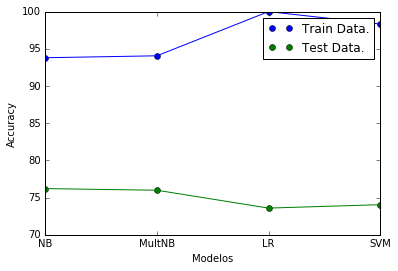

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.invert_xaxis()
axlab = ["NB", "MultNB", "LR", "SVM"]
ax_x = range(len(ax_y_test))
ax_y_test = [76.21, 75.99, 73.59, 74.05]
ax_y_train = [93.80, 94.06, 100., 98.33]


ax.plot(ax_x, ax_y_train, 'bo', label="Train Data.")
ax.plot(ax_x, ax_y_train)
plt.xticks(ax_x, axlab)
ax.plot(ax_x, ax_y_test, 'go', label="Test Data.")
ax.plot(ax_x, ax_y_test)
plt.legend()
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.show()